In [1]:
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline 
plt.rcParams["figure.figsize"] = [16, 12]

In [2]:
df = pd.read_csv("./co-emissions-per-capita.csv", thousands=",")

In [3]:
df.head()

,Entity,Code,Year,Per capita CO₂ emissions (tonnes per capita)
0,Afghanistan,AFG,1800,0.0
1,Afghanistan,AFG,1801,0.0
2,Afghanistan,AFG,1802,0.0
3,Afghanistan,AFG,1803,0.0
4,Afghanistan,AFG,1804,0.0


In [4]:
df.dtypes

Entity                                           object
Code                                             object
Year                                              int64
Per capita CO₂ emissions (tonnes per capita)    float64
dtype: object

In [5]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Hai

In [6]:
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO',
       'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU',
       'LUX', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL',
       'MRT', 'MUS', 'MEX', nan, 'MDA', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR',
       'NAM', 'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'PRK',
       'NOR', '

In [9]:
table = pd.pivot_table(df, values='Per capita CO₂ emissions (tonnes per capita)', index=['Code'], columns=['Year'])
table.head()

Year,1751,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Code,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153819,0.241402,0.293448,0.411531,0.349939,0.315155,0.298833,0.299599,0.353702,0.366302
AGO,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.171263,1.222442,1.235154,1.244588,1.322347,1.245199,1.279979,1.247739,1.226892,1.188212
ALB,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.461117,1.476664,1.562529,1.789022,1.680147,1.733478,1.955706,2.034556,2.143579,2.177065
AND,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.422628,6.116644,6.117586,5.862330,5.911756,5.895925,5.827399,6.117346,6.618792,6.758706
ARE,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.359906,21.546656,19.123529,18.761065,19.540999,18.677113,23.020032,24.849215,25.181911,24.656371


In [10]:
def country_plot(nameOfCountry):
    data = table.loc[nameOfCountry]
    plt.plot(data)
    plt.title(nameOfCountry)

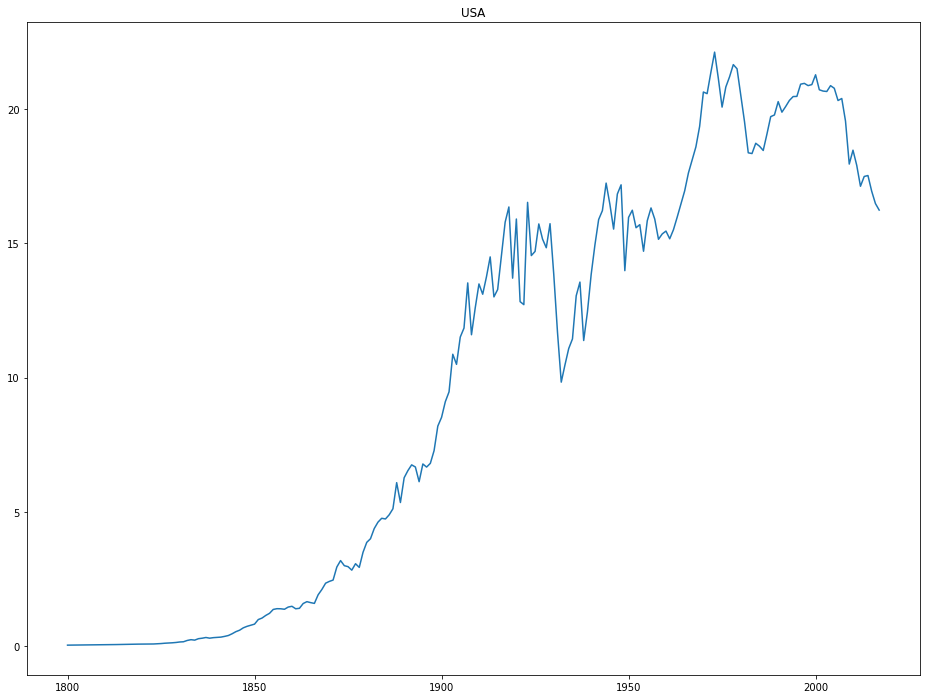

In [12]:
country_plot('USA')